<a href="https://colab.research.google.com/github/izumitempest/reconyx-framework/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Regression with Neural Networks in TensorFlow

There manyy definitions for aregression problem, but we're gonna simplify it: predictiong a numerical variable based on some combination of variables, even shorter... prediciting a number

In [1]:
import tensorflow as tf
print(tf.__version__)

2.19.0


## Creating data to view and fit

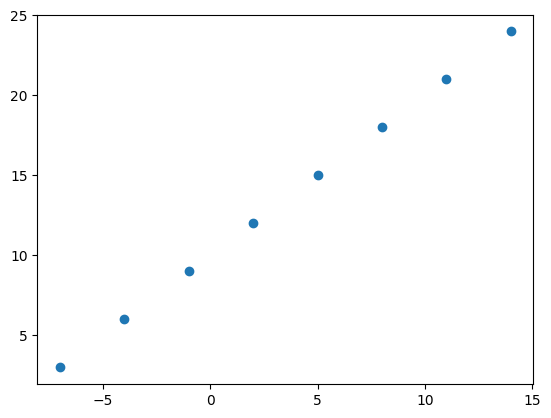

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#CREATE FEATURES

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it

plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shape

In [4]:
#Create a demo tensor for our housing price prediction problem

house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [6]:
X[1], y[1]

(np.float64(-4.0), np.float64(6.0))

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [10]:
# Turn nmpy arrays into tensors
X  = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

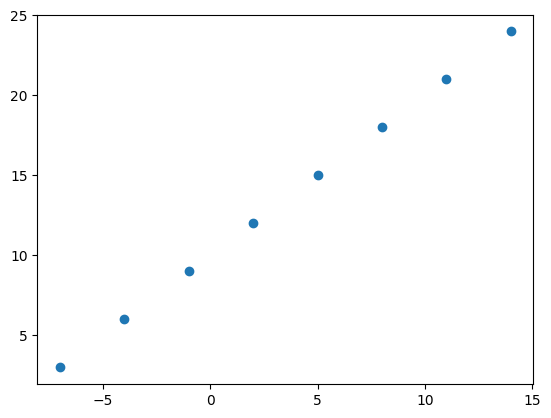

In [12]:
plt.scatter(X, y)

### Steps in modelling with TensorFlow

1. Creating a model - Define the input and output layers, as well as the hidden layers of a deep learning model
2. Compiling the model - Define the loss function (in other words, the function which tells our model how wrong it is) and the optimiser (tells the model hw to improve the pattern its learnin) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - Letting the model try to find patterns between X and y (features and labels)

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

In [25]:
# Set random seed
tf.random.set_seed(42)

#Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step - loss: 14.7852 - mae: 14.7852
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 14.6527 - mae: 14.6527
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 14.5202 - mae: 14.5202
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.3877 - mae: 14.3877
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 14.2552 - mae: 14.2552


In [15]:
#Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [24]:
# Try and make a  prediction
model.predict(tf.expand_dims(tf.constant([17.0]), axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


array([[29.438623]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model.



In [27]:
# Rebuild model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step - loss: 18.7922 - mae: 18.7922
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 18.5109 - mae: 18.5109
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 18.2297 - mae: 18.2297
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 17.9484 - mae: 17.9484
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 17.6672 - mae: 17.6672
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 17.3859 - mae: 17.3859
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 17.1047 - mae: 17.1047
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 16.8234 - mae: 16.8234
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 16.5422 - mae: 16.5422
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 16.2609 - mae: 16.2609
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 15.9797 - mae: 15.9797
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 15.6984 - mae: 15.6984
Epoch 13/100
1/1 ━━━━━━

In [29]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [31]:
model.predict(tf.expand_dims(tf.constant([17.0]), axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[29.227324]], dtype=float32)

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=1.0),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.0257 - mae: 9.0257
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.3222 - mae: 8.3222
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.1559 - mae: 7.1559
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.5461 - mae: 5.5461
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.0984 - mae: 6.0984
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 5.5407 - mae: 5.5407
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 4.1710 - mae: 4.1710
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3.0644 - mae: 3.0644
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 3.2632 - mae: 3.2632
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2.4903 - mae: 2.4903
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.8521 - mae: 0.8521
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1.4479 - mae: 1.4479
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step 

In [37]:
model.predict(tf.expand_dims(tf.constant([17.0]), axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[27.467907]], dtype=float32)